In [2]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
# Read data

diabetes_df = pd.read_csv('diabetes-dataset.csv', encoding='ISO-8859-1')

## Dataset Overview

In [4]:
nRow, nCol = diabetes_df.shape
print('There are {} rows and {} columns'.format(nRow, nCol))

There are 768 rows and 9 columns


In [5]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Dataset attributes

colList = diabetes_df.columns.tolist()

print('The dataset has the following attributes:', colList)

The dataset has the following attributes: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [7]:
# Dataset featureset and outcome variable

print('The datasete has the following {} featureset: {}'.format(len(colList)-1, colList[:len(colList)-1]))
print('The dataset has the following column as the target variable:', colList[-1])

The datasete has the following 8 featureset: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
The dataset has the following column as the target variable: Outcome


## Dataset Analysis

In [8]:
# Dataset summary statistics for numeric colums

diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The **count** row provides the total number of **non-null data** in a column. Since all the columns have a count of 768, we don't need to make consideration for non-null values.

In [9]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# Dataset variance of values in different columns

diabetes_df.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

The above data shows a high variance in different colums. Therefore, we would need either need to perform **data scaling** or **data normalization**.

Dataset before normalization:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
461,1,71,62,0,0,21.8,0.416,26,0
588,3,176,86,27,156,33.3,1.154,52,1
179,5,130,82,0,0,39.1,0.956,37,1
650,1,91,54,25,100,25.2,0.234,23,0
360,5,189,64,33,325,31.2,0.583,29,1


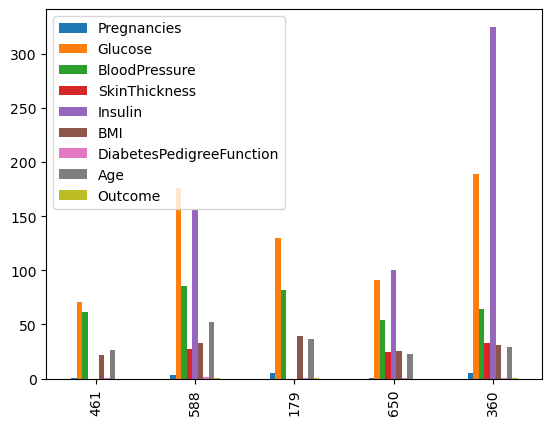

In [11]:
# Data normalization

print('Dataset before normalization:')
diabetes_df_sample = diabetes_df.sample(n=5)
diabetes_df_sample.plot(kind='bar')
diabetes_df_sample.head()

Dataset after normalization:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
461,0.2,0.375661,0.720930,0.000000,0.000000,0.557545,0.360485,0.500000,0.0
588,0.6,0.931217,1.000000,0.818182,0.480000,0.851662,1.000000,1.000000,1.0
179,1.0,0.687831,0.953488,0.000000,0.000000,1.000000,0.828423,0.711538,1.0
650,0.2,0.481481,0.627907,0.757576,0.307692,0.644501,0.202773,0.442308,0.0
360,1.0,1.000000,0.744186,1.000000,1.000000,0.797954,0.505199,0.557692,1.0


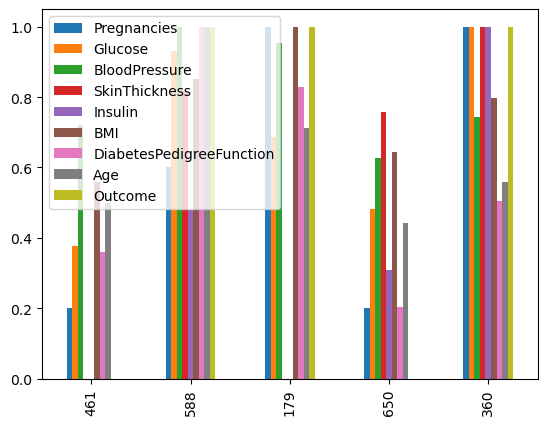

In [12]:
diabetes_df_scaled = diabetes_df_sample.copy()

for column in diabetes_df_scaled.columns:
    diabetes_df_scaled[column] = diabetes_df_scaled[column]/diabetes_df_scaled[column].abs().max()

print('Dataset after normalization:')
diabetes_df_scaled.plot(kind='bar')
diabetes_df_scaled.head()